In [62]:
%matplotlib notebook
import matplotlib.pyplot as plt
from __future__ import division
from sympy import *
from sympy.mpmath import laguerre

init_printing(fontsize='15pt',use_latex='mathjax')

# Symbol examples
# xi, yi, zi, t = symbols('x_i y_i z_i t')
# k, m, n = symbols('k m n', integer=True)
# f, g, h = symbols('f g h', cls=Function)

###  Gives the generalized (associated) Laguerre polynomial, defined by


The Laguerre polynomials are orthogonal with respect to the weight $z^a e^{−z}$ on [0,∞)[0,∞).



<IPython.core.display.Javascript object>


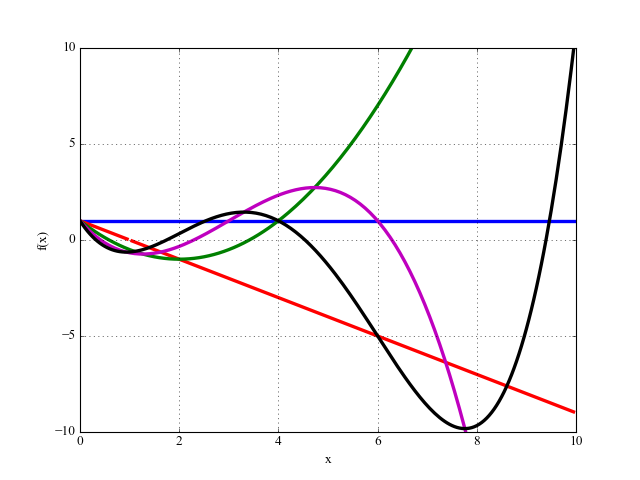

In [63]:
# Hermite polynomials L_n(x) on the real line for n=0,1,2,3,4
f0 = lambda x: laguerre(0,0,x)
f1 = lambda x: laguerre(1,0,x)
f2 = lambda x: laguerre(2,0,x)
f3 = lambda x: laguerre(3,0,x)
f4 = lambda x: laguerre(4,0,x)
mpmath.plot([f0,f1,f2,f3,f4],[0,10],[-10,10])

###  orthogonality

In [64]:
Lm = lambda t: laguerre(m,a,t)
Ln = lambda t: laguerre(n,a,t)
a, n, m = 2.5, 2, 4
mpmath.chop(mpmath.quad(lambda t: exp(-t)*t**a*Lm(t)*Ln(t), [0,mpmath.inf]))

mpf('0.0')

##  $R_l(\tau)$

In [65]:
tau, tauprime, taub = symbols("tau tauprime tau_b", positive=True)
b, cn, Ln = symbols("b, c_n L_n")
Ln, Rl = symbols("L_n, R_l", cls=Function)
x, a, b, omegaxi = symbols("x a b omega_xi")
n, k, l, lprime, n0 = symbols("n, k l lprime n0", integer=True)


Rl=Sum((tau/taub)**abs(l)*exp(-b*tau**2)*cn**abs(l)*Ln(a* tau**2)**abs(l), (n,0,oo))
Rlprime_tauprime = Rl.subs(tau,tauprime).subs(l,lprime)
Rl, Rlprime_tauprime

⎛  ∞                                          ∞                               
⎜ ____                                       ____                             
⎜ ╲                                          ╲                                
⎜  ╲               │l│                   2    ╲                 │l ̍│         
⎜   ╲     │l│ ⎛ τ ⎞       │l│⎛   2⎞  -b⋅τ      ╲     │l ̍│ ⎛τ ̍⎞         │l ̍│
⎜   ╱  c_n   ⋅⎜───⎟   ⋅L_n   ⎝a⋅τ ⎠⋅ℯ     ,    ╱  c_n     ⋅⎜───⎟     ⋅L_n     
⎜  ╱          ⎝τ_b⎠                           ╱            ⎝τ_b⎠              
⎜ ╱                                          ╱                                
⎜ ‾‾‾‾                                       ‾‾‾‾                             
⎝n = 0                                      n = 0                             

                 ⎞
                 ⎟
                 ⎟
                2⎟
⎛     2⎞  -b⋅τ ̍ ⎟
⎝a⋅τ ̍ ⎠⋅ℯ       ⎟
                 ⎟
                 ⎟
                 ⎟
                 ⎠

##  $g_0(\tau)$

In [66]:
Lk0 = symbols('L_k^0',cls=Function)
gk = symbols('g_k')
g0=exp(-b*tau**2)*Sum(gk*Lk0(a* tau**2), (k,0,n0))
g0

         n₀                  
        ___                  
     2  ╲                    
 -b⋅τ    ╲             ⎛   2⎞
ℯ     ⋅  ╱   g_k⋅L_k__0⎝a⋅τ ⎠
        ╱                    
        ‾‾‾                  
       k = 0                 

### RHS Damper part

In [77]:
Jl, Jlprime = symbols("J_l J_lprime",cls=Function)
expr=Integral(I**(lprime-l) * tauprime * Rlprime_tauprime* Jlprime(-omegaxi* tauprime)* Jl(-omegaxi*tau),
 (tauprime, 0, oo))

expr=Sum(expr,(lprime, -oo, oo))
expr=simplify(expand_power_base(expr))
expr
print(expr)

Sum(Integral(I**(-l + lprime)*tauprime*J_l(-omega_xi*tau)*J_lprime(-omega_xi*tauprime)*Sum(c_n**Abs(lprime)*tau_b**(-Abs(lprime))*tauprime**Abs(lprime)*L_n(a*tauprime**2)**Abs(lprime)*exp(-b*tauprime**2), (n, 0, oo)), (tauprime, 0, oo)), (lprime, -oo, oo))


In [78]:
newexpr=expr.args[0].args[0].args[0]*\
expr.args[0].args[0].args[1]*\
expr.args[0].args[0].args[2]*\
expr.args[0].args[0].args[3]*\
expr.args[0].args[0].args[4].args[0]
print(newexpr)
fact=I**(-l + lprime)*cn**Abs(lprime)*taub**(-Abs(lprime))*Jl(-omegaxi*tau)
newexpr=fact*simplify(Integral(newexpr/fact,(tauprime,0,oo)))
newexpr

I**(-l + lprime)*c_n**Abs(lprime)*tau_b**(-Abs(lprime))*tauprime*tauprime**Abs(lprime)*J_l(-omega_xi*tau)*J_lprime(-omega_xi*tauprime)*L_n(a*tauprime**2)**Abs(lprime)*exp(-b*tauprime**2)


                                         ∞                                    
                                         ⌠                                    
                                         ⎮                                    
 -l + l ̍    │l ̍│    -│l ̍│             ⎮    │l ̍│ + 1                    │l 
ⅈ        ⋅c_n     ⋅τ_b      ⋅J_l(-ωₓᵢ⋅τ)⋅⎮ τ ̍         ⋅J_l ̍(-ωₓᵢ⋅τ ̍)⋅L_n   
                                         ⌡                                    
                                         0                                    

                          
                          
                  2       
̍│⎛     2⎞  -b⋅τ ̍        
  ⎝a⋅τ ̍ ⎠⋅ℯ        d(τ ̍)
                          
                          

## Laguerre integral

### Integral as from Chao p.316

In [79]:
eta, alpha, y = symbols('eta, alpha, y')
laguerre_lhs=Integral(x**(lprime+1) *exp(-eta*x**2) *Jlprime(x*y)* Ln(alpha * x**2)**lprime,(x, 0, oo))
temp=laguerre_lhs.subs(alpha,a).subs(lprime,abs(lprime)).subs(y,-omegaxi).subs(eta,b)
laguerre1_lhs=temp.transform(x,tauprime)
laguerre1_lhs

∞                                                              
⌠                                                              
⎮                                                      2       
⎮    │l ̍│ + 1                    │l ̍│⎛     2⎞  -b⋅τ ̍        
⎮ τ ̍         ⋅J_l ̍(-ωₓᵢ⋅τ ̍)⋅L_n     ⎝a⋅τ ̍ ⎠⋅ℯ        d(τ ̍)
⌡                                                              
0                                                              

###  Solution

In [80]:
laguerre_rhs=(eta- alpha)**n/(2**(lprime+1)*eta**(lprime+n+1))*y**lprime*exp(-y**2/(4*eta))*Ln(alpha*y**2/(4*eta*(alpha-eta)))**lprime
laguerre1_rhs=laguerre_rhs.subs(alpha,a).subs(lprime,abs(lprime)).subs(y,-omegaxi).subs(eta,b)
laguerre1_rhs

                                                                             2
                                                                         -ωₓᵢ 
                                                          ⎛        2  ⎞  ─────
 -│l ̍│ - 1  -n - │l ̍│ - 1       │l ̍│         n    │l ̍│⎜   a⋅ωₓᵢ   ⎟   4⋅b 
2          ⋅b              ⋅(-ωₓᵢ)     ⋅(-a + b) ⋅L_n     ⎜───────────⎟⋅ℯ     
                                                          ⎝4⋅b⋅(a - b)⎠       

 
 
─
 
 
 

###  Substituting Laguerre 1

In [81]:
newexpr=Sum(simplify(newexpr.subs(laguerre1_lhs,laguerre1_rhs)),(lprime, -oo, oo),(n, 0, oo))
newexpr

  ∞      ∞                                                                    
_____  _____                                                                  
╲      ╲                                                                      
 ╲      ╲                                                                     
  ╲      ╲                                                                    
   ╲      ╲                                                                   
   ╱      ╱     -│l ̍│ - 1  -l + l ̍  -n - │l ̍│ - 1    │l ̍│    -│l ̍│       
  ╱      ╱     2          ⋅ⅈ        ⋅b              ⋅c_n     ⋅τ_b      ⋅(-ωₓᵢ)
 ╱      ╱                                                                     
╱      ╱                                                                      
‾‾‾‾‾  ‾‾‾‾‾                                                                  
n = 0 l ̍ = -∞                                                                

                                                   

### Product with $k g_0$

In [83]:
k = symbols('kappa')
k * g0* newexpr

                                    ∞      ∞                                  
                                  _____  _____                                
         ⎛  n₀                  ⎞ ╲      ╲                                    
         ⎜ ___                  ⎟  ╲      ╲                                   
       2 ⎜ ╲                    ⎟   ╲      ╲                                  
   -b⋅τ  ⎜  ╲             ⎛   2⎞⎟    ╲      ╲                                 
κ⋅ℯ     ⋅⎜  ╱   g_k⋅L_k__0⎝a⋅τ ⎠⎟⋅   ╱      ╱     -│l ̍│ - 1  -l + l ̍  -n - │
         ⎜ ╱                    ⎟   ╱      ╱     2          ⋅ⅈ        ⋅b      
         ⎜ ‾‾‾                  ⎟  ╱      ╱                                   
         ⎝k = 0                 ⎠ ╱      ╱                                    
                                  ‾‾‾‾‾  ‾‾‾‾‾                                
                                  n = 0 l ̍ = -∞                              

                                                   